In [2]:
import numpy as np
import os
import json
from ast import literal_eval
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots

In [27]:
trends_by_pretraining_steps = {}
# for pretraining_steps in [1e4, 2e4, 8e4, 2e5, 8e5, 2e6]:
for pretraining_steps in [8e4, 2e5, 8e5]:
    trend = []
    total_steps = pretraining_steps
    for evaluation_episodes in [10, 20, 40, 80, 160, 320]:
        try:
            with open (os.path.expanduser("./sac_metalearn10_default_400-400_" + str(int(pretraining_steps)) + "_32_final_" + str(evaluation_episodes) + "_results.txt"), "r") as file:
                input = ""
                for i in file.readlines():
                    input += i
                results = literal_eval(input)
                attempts = sum(results["attempts by task"].values())
                successes = sum(results["successes by task"].values())
                total_steps += results["test steps"]
                trend.append((total_steps, successes / attempts))
        except:
            print("Issue with some input")
    trends_by_pretraining_steps[pretraining_steps] = trend

In [28]:
list(trends_by_pretraining_steps.items())


[(80000.0,
  [(90000.0, 0.0),
   (110000.0, 0.0),
   (150000.0, 0.0),
   (229557.0, 0.0125),
   (388660.0, 0.0125),
   (707099.0, 0.00625)]),
 (200000.0,
  [(210000.0, 0.0),
   (229430.0, 0.05),
   (269016.0, 0.025),
   (349016.0, 0.0),
   (508555.0, 0.00625),
   (824978.0, 0.01875)]),
 (800000.0,
  [(807928.0, 0.3),
   (826491.0, 0.15),
   (860774.0, 0.175),
   (931961.0, 0.15),
   (1058746.0, 0.30625),
   (1290254.0, 0.371875)])]

[ 10000.  30000.  70000. 149557. 308660. 627099.  10000.  29430.  69016.
 149016. 308555. 624978.   7928.  26491.  60774. 131961. 258746. 490254.]
[array([0.     , 0.     , 0.     , 0.0125 , 0.0125 , 0.00625]), array([0.     , 0.05   , 0.025  , 0.     , 0.00625, 0.01875]), array([0.3     , 0.15    , 0.175   , 0.15    , 0.30625 , 0.371875])]


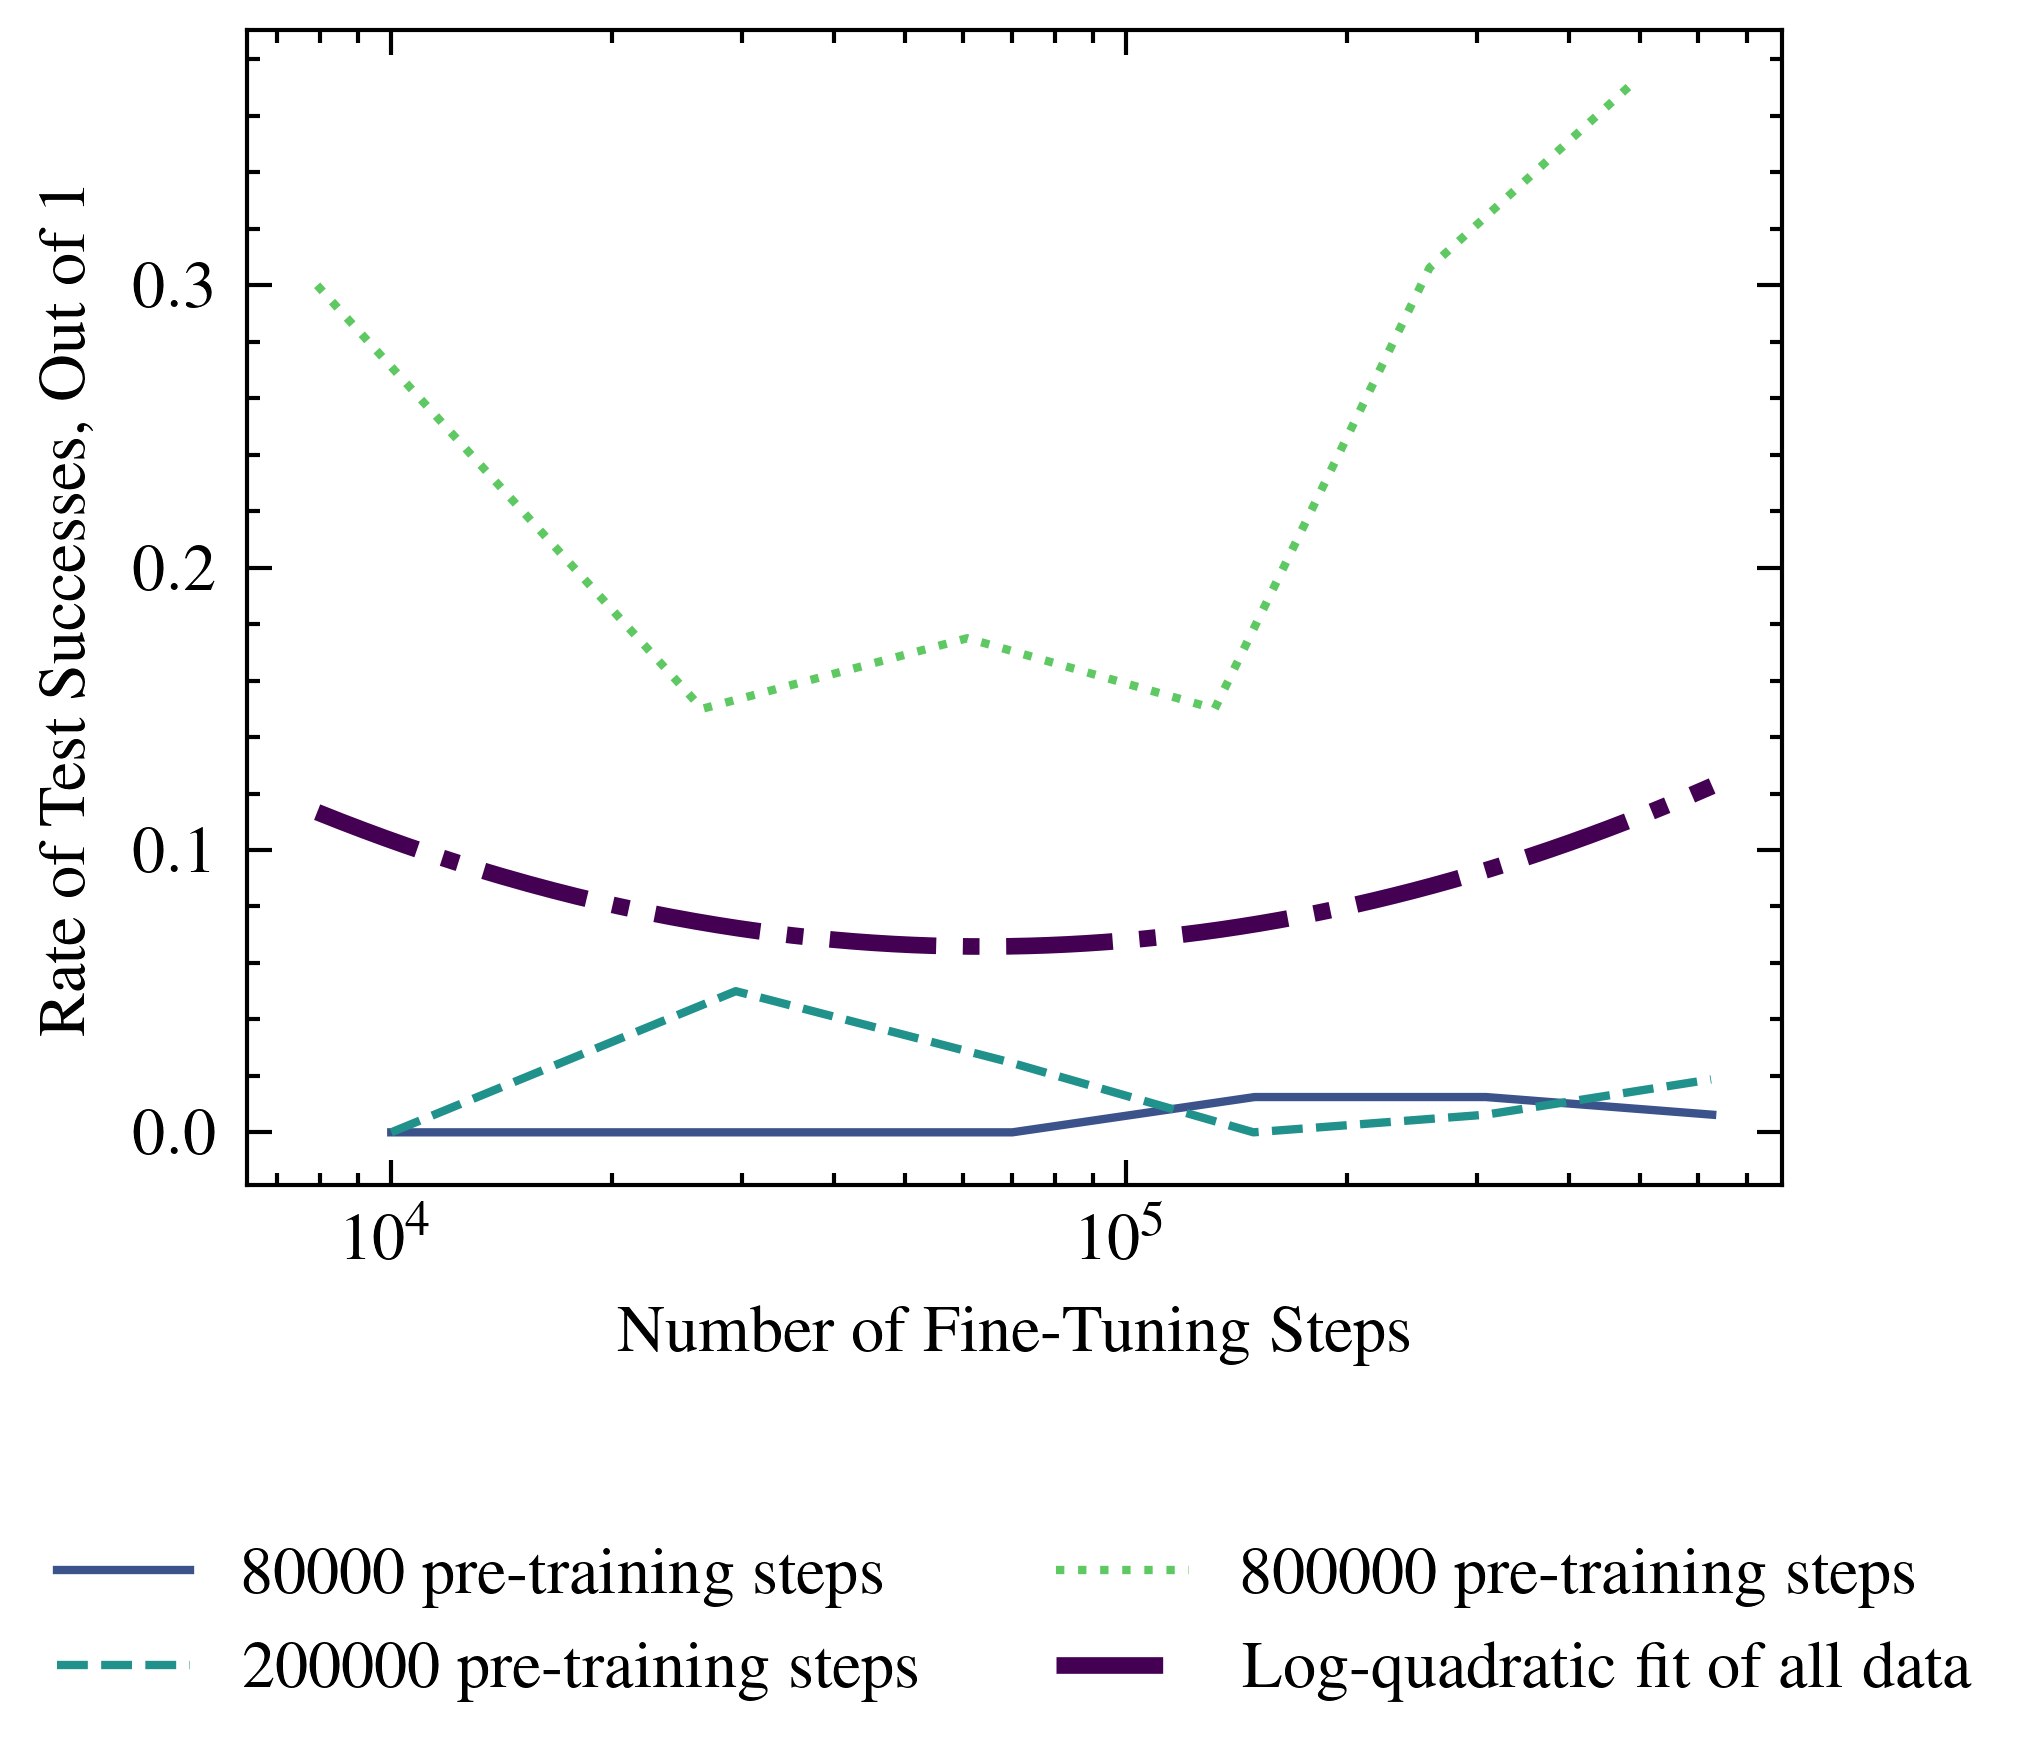

In [29]:
plt.style.use(['science', 'ieee'])
plt.set_cmap('viridis')
plt.xlabel('Number of Fine-Tuning Steps')
plt.ylabel('Rate of Test Successes, Out of 1')
plt.xscale('log')
num_trends = len(trends_by_pretraining_steps)
all_steps = []
all_rates = []
for idx, (pretrain_steps, trend) in enumerate(trends_by_pretraining_steps.items()):
    unzipped_trend = list(zip(*trend))    
    total_steps, success_rate = map(np.array, unzipped_trend)
    all_steps.append(total_steps - pretrain_steps)
    all_rates.append(success_rate)
    plt.plot(
        total_steps - pretrain_steps, success_rate,
        label=str(int(pretrain_steps)) + " pre-training steps",
        color=plt.cm.viridis((idx + 1) / (num_trends + 1)))

all_steps_reshaped = np.array(all_steps).flatten()
all_rates_reshaped = np.array(all_rates).flatten()
print(all_steps_reshaped)
print(all_rates)

a, b, c = np.polyfit(np.log(all_steps_reshaped), all_rates_reshaped, 2)
def quadratic_fit(steps):
    return a * np.log(steps)**2 + b * np.log(steps) + c

x_fit = np.linspace(min(all_steps_reshaped), max(all_steps_reshaped), 1000)
y_fit = quadratic_fit(x_fit)
plt.plot(x_fit, y_fit, label="Log-quadratic fit of all data", color=plt.cm.viridis(0), linewidth=2)
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol=2)
# plt.savefig('ml10-curve')
plt.show()